<a href="https://colab.research.google.com/github/Sajidcodecrack/Urban-lake-Waste-Classification/blob/main/AllClass11v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 14.7 MB/s eta 0:00:00


In [3]:
import os

zip_path = '/content/drive/MyDrive/AllClassV11/plan_B.v9i.yolov11.zip'  # Update with correct ZIP file path

if os.path.exists(zip_path):
    print("ZIP file found. Proceeding with extraction.")
else:
    print("ZIP file not found! Please check the path.")


ZIP file found. Proceeding with extraction.


In [4]:
import os
import shutil
from collections import defaultdict
import zipfile
import supervision as sv

# Step 1: Unzip the dataset if not already done
zip_path = '/content/drive/MyDrive/AllClassV11/plan_B.v9i.yolov11.zip'  # Path to your zip file
extract_path = '/content/datasets11v'  # Path to extract the dataset

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Define the paths
dataset_path = extract_path  # Use the extracted path
images_path = os.path.join(dataset_path, 'images')
labels_path = os.path.join(dataset_path, 'labels')

# Define the splits
splits = ['train', 'val', 'test']

# Initialize a dictionary to store image files per class
class_images = defaultdict(list)

# Populate the class_images dictionary from existing splits
for split in splits:
    split_images_path = os.path.join(dataset_path, split, 'images')

    # Check if the split directory exists
    if not os.path.isdir(split_images_path):
        print(f"Directory not found: {split_images_path}")
        continue

    for image_file in os.listdir(split_images_path):
        if image_file.endswith('.jpg'):  # Adjust the extension if needed
            label_file = image_file.replace('.jpg', '.txt')
            class_id = None

            # Check if the label file exists before trying to open it
            label_path = os.path.join(labels_path, label_file)
            if os.path.exists(label_path):
                # Read the label file to get the class ID
                with open(label_path, 'r') as file:
                    line = file.readline()
                    class_id = line.split()[0]  # Get the class ID from the first line
                class_images[split].append((image_file, class_id))
            else:
                # If the label file doesn't exist, log a warning and delete the image file
                print(f"Warning: Label file {label_file} not found, deleting image {image_file}")
                image_path = os.path.join(images_path, image_file)
                if os.path.exists(image_path):
                    os.remove(image_path)  # Delete the image file

# After cleaning, ensure that class_images is populated before proceeding
if not any(class_images.values()):
    print("No valid image-label pairs found. Please check the dataset.")
else:
    # Now, we use the supervision package to load the valid dataset

    # Load the dataset into a DetectionDataset object
    ds = sv.DetectionDataset.from_yolo(
        images_directory_path=f"{dataset_path}/train/images",
        annotations_directory_path=f"{dataset_path}/train/labels",
        data_yaml_path=f"{dataset_path}/data.yaml"
    )

    # Get the minimum samples per class (based on the smallest class count)
    class_sample_counts = defaultdict(int)
    for split in splits:
        for image_file, class_id in class_images[split]:
            class_sample_counts[class_id] += 1

    # Ensure that class_sample_counts is populated
    if not class_sample_counts:
        print("No class samples found. Please verify dataset integrity.")
    else:
        # Find the minimum number of samples per class
        min_samples_per_class = min(class_sample_counts.values())

        # Split the dataset into training (70%), validation (10%), and testing (20%) while maintaining balance
        train_ds, test_ds = ds.split(split_ratio=0.7, random_state=42, shuffle=True)
        val_ds, test_ds = test_ds.split(split_ratio=0.5, random_state=42, shuffle=True)

        # Further balance the dataset by ensuring each split has the same number of samples per class
        balanced_train = []
        balanced_val = []
        balanced_test = []

        # Sample the same number of images per class for each split
        for class_id in set(class_sample_counts.keys()):
            # Collect images for the current class from each split
            train_images = [img for img in class_images['train'] if img[1] == class_id]
            val_images = [img for img in class_images['val'] if img[1] == class_id]
            test_images = [img for img in class_images['test'] if img[1] == class_id]

            # Sample the same number of images for each split to maintain class balance
            balanced_train.extend(train_images[:min_samples_per_class])
            balanced_val.extend(val_images[:min_samples_per_class])
            balanced_test.extend(test_images[:min_samples_per_class])

        # Print the sizes of the splits
        print(f"Balanced Training set size: {len(balanced_train)}")
        print(f"Balanced Validation set size: {len(balanced_val)}")
        print(f"Balanced Test set size: {len(balanced_test)}")


Directory not found: /content/datasets11v/val/images
No valid image-label pairs found. Please check the dataset.


In [5]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.4/112.6 GB disk)


In [6]:
!unzip /content/drive/MyDrive/AllClassV11/plan_B.v9i.yolov11.zip -d /content/


Archive:  /content/drive/MyDrive/AllClassV11/plan_B.v9i.yolov11.zip
  inflating: /content/README.dataset.txt  
  inflating: /content/README.roboflow.txt  
  inflating: /content/data.yaml      
   creating: /content/test/
   creating: /content/test/images/
 extracting: /content/test/images/20241223_131552_jpg.rf.2ddd94a80accafc099dea636b668f687.jpg  
 extracting: /content/test/images/20241227_113715_jpg.rf.f9ab8284061ae13a48188740e48e5f8e.jpg  
 extracting: /content/test/images/IMG_20250109_133348_jpg.rf.efc9f7cddf21927932db0cb35577c974.jpg  
 extracting: /content/test/images/IMG_20250109_133840_jpg.rf.98cad56c8a7dc59cd6eac9520ce59f18.jpg  
 extracting: /content/test/images/IMG_20250109_134306_jpg.rf.cbc84a9004d385eccd37489adfaa1214.jpg  
 extracting: /content/test/images/IMG_20250109_134313_jpg.rf.5a5ca963fa1a454038a5e582d4127607.jpg  
 extracting: /content/test/images/IMG_20250109_152612_jpg.rf.ef308531e7155dd8170f7393d776cd7d.jpg  
 extracting: /content/test/images/IMG_20250109_15301

In [7]:
from ultralytics import YOLO
print(YOLO('yolo11n.pt'))


100%|██████████| 5.35M/5.35M [00:00<00:00, 342MB/s]

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [8]:
import os
import yaml
from collections import defaultdict

# Define the paths for your images
train_images_path = '/content/datasets11v/train/images'
val_images_path = '/content/datasets11v/valid/images'  # Update this if necessary
test_images_path = '/content/datasets11v/test/images'

# Define the class names (replace these with your actual class names)
class_names = ['Rubber', 'Organic', 'Paper', 'Plastic']

# Step 1: Create the data.yaml file
data_yaml = {
    'train': train_images_path,
    'val': val_images_path,
    'test': test_images_path,
    'nc': len(class_names),  # Number of classes
    'names': class_names
}

# Path where you want to save the data.yaml file
yaml_path = '/content/datasets11v/data.yaml'

# Write the YAML file
with open(yaml_path, 'w') as file:
    yaml.dump(data_yaml, file)

print(f"data.yaml has been written to {yaml_path}")




data.yaml has been written to /content/datasets11v/data.yaml


In [9]:
import yaml

# Load the data.yaml file
yaml_path = '/content/datasets11v/data.yaml'

with open(yaml_path, 'r') as file:
    data = yaml.load(file, Loader=yaml.FullLoader)  # Use yaml.FullLoader to avoid warnings

# Extract the class names from the YAML file
class_names = data['names']

# Count the number of classes
num_classes = len(class_names)

# Print the number of classes
print(f"Total number of classes: {num_classes}")
print("Class names:")
for class_name in class_names:
    print(f"- {class_name}")


Total number of classes: 4
Class names:
- Rubber
- Organic
- Paper
- Plastic


In [10]:
import os
import yaml

# Load the data.yaml file
yaml_path = '/content/datasets11v/data.yaml'

with open(yaml_path, 'r') as file:
    data = yaml.load(file, Loader=yaml.FullLoader)  # Use yaml.FullLoader to avoid warnings

# Extract paths for train, val, and test
train_path = data['train']
val_path = data['val']
test_path = data['test']

# Function to count images in a given directory
def count_images(directory, split_name):
    image_count = 0
    for file in os.listdir(directory):
        if file.endswith('.jpg'):  # Assuming images are in .jpg format
            image_count += 1  # Increment the count for each image file
    print(f"{split_name} set: {image_count} images")
    return image_count

# Count images in each dataset
train_images_count = count_images(train_path, "Training")
val_images_count = count_images(val_path, "Validation")
test_images_count = count_images(test_path, "Testing")

# Print total number of images across all datasets
total_images_count = train_images_count + val_images_count + test_images_count
print(f"\nTotal number of images across all datasets: {total_images_count}")


Training set: 1055 images
Validation set: 28 images
Testing set: 25 images

Total number of images across all datasets: 1108


In [11]:
!yolo train model=yolo11n.pt data=/content/datasets11v/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets11v/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b


image 1/25 /content/datasets11v/test/images/20241223_131552_jpg.rf.2ddd94a80accafc099dea636b668f687.jpg: 640x640 1 Paper, 9.0ms
image 2/25 /content/datasets11v/test/images/20241227_113715_jpg.rf.f9ab8284061ae13a48188740e48e5f8e.jpg: 640x640 (no detections), 9.2ms
image 3/25 /content/datasets11v/test/images/IMG_20250109_133348_jpg.rf.efc9f7cddf21927932db0cb35577c974.jpg: 640x640 (no detections), 8.8ms
image 4/25 /content/datasets11v/test/images/IMG_20250109_133840_jpg.rf.98cad56c8a7dc59cd6eac9520ce59f18.jpg: 640x640 1 Organic, 1 Paper, 8.5ms
image 5/25 /content/datasets11v/test/images/IMG_20250109_134306_jpg.rf.cbc84a9004d385eccd37489adfaa1214.jpg: 640x640 2 Organics, 1 Paper, 8.3ms
image 6/25 /content/datasets11v/test/images/IMG_20250109_134313_jpg.rf.5a5ca963fa1a454038a5e582d4127607.jpg: 640x640 1 Organic, 2 Papers, 8.1ms
image 7/25 /content/datasets11v/test/images/IMG_20250109_152612_jpg.rf.ef308531e7155dd8170f7393d776cd7d.jpg: 640x640 2 Organics, 2 Papers, 11.8ms
image 8/25 /conten

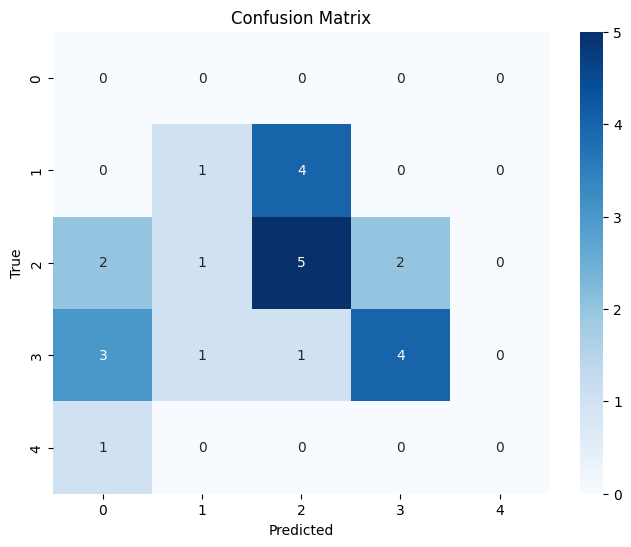

In [12]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np
import os

# Step 1: Load the best model
model_path = '/content/runs/detect/train/weights/best.pt'  # Update this to your best.pt model path
model = YOLO(model_path)  # Load the trained model using the YOLO API

# Step 2: Run predictions on the test dataset
results = model.predict(source='/content/datasets11v/test/images')  # Use the test images directory

# Step 3: Get true labels from the test dataset labels directory
true_labels = []
label_files = sorted(os.listdir('/content/datasets11v/test/labels'))  # Ensure correct order

for filename in label_files:
    if filename.endswith('.txt'):
        with open(os.path.join('/content/datasets11v/test/labels', filename), 'r') as f:
            # Read the first line of the label file (which contains class ID)
            line = f.readline().strip()
            if line:  # Check if the line is not empty
                class_id = int(line.split()[0])  # Get the class ID
                true_labels.append(class_id)

# Step 4: Get predicted labels from all images
pred_labels = []

for result in results:  # Loop through all images
    if len(result.boxes.cls) > 0:  # Check if any object was detected
        pred_labels.append(int(result.boxes.cls[0].cpu().numpy()))  # Take the first predicted class per image
    else:
        pred_labels.append(-1)  # Assign -1 for images with no detections

# Ensure both lists have the same length
print(f"True labels count: {len(true_labels)}, Predicted labels count: {len(pred_labels)}")

if len(true_labels) == len(pred_labels):
    # Step 5: Compute confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)

    # Step 6: Compute evaluation metrics
    precision = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
    recall = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='macro', zero_division=0)

    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
else:
    print("Error: True labels and predicted labels do not match in length.")
